## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spotify_data.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les f�es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


In [3]:
fulldata = data  # keeping the raw data

#removing the unwanted genres and dropping artist name
data = data[data['genre'] != 'Movie']
data = data[data['genre'] != 'Soundtrack']
data = data[data['genre'] != 'Comedy']
data = data.drop('artist_name', axis = 1)
data.head()

,genre,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,04-Apr,0.6930
136,R&B,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,03-Apr,0.3230
137,R&B,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,04-Apr,0.0862
138,R&B,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,04-Apr,0.7680
139,R&B,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,04-Apr,0.4660


## Data Visualisation

#### Genre Distribution

In [4]:
from collections import Counter
target = list(data['genre'])
countGenre = Counter(target)  # creates a dict for each genre and counts them
countGenre.most_common() ## presents it in tuple format in a list

[('Indie', 9543),
 ('Jazz', 9441),
 ('Pop', 9386),
 ('Electronic', 9377),
 ('Children�s Music', 9353),
 ('Folk', 9299),
 ('Hip-Hop', 9295),
 ('Rock', 9272),
 ('Alternative', 9263),
 ('Classical', 9256),
 ('Rap', 9232),
 ('World', 9096),
 ('Soul', 9089),
 ('Blues', 9023),
 ('R&B', 8992),
 ('Anime', 8936),
 ('Reggaeton', 8927),
 ('Ska', 8874),
 ('Reggae', 8771),
 ('Dance', 8701),
 ('Country', 8664),
 ('Opera', 8280),
 ("Children's Music", 5403),
 ('A Capella', 119)]

#### Energy metrics (each track is assigned a value from 0.0 to 1.0)

In [5]:
from collections import Counter
import statistics

target = list(data['energy']) ##extracts the target variable
target.sort()
counterDict = Counter(target) #creates dictionary for each score
commonScoresArray = counterDict.most_common()

print('Median energy score', statistics.median(target))
print('Mean energy score', statistics.mean(target))
print('Top 10 energy scores with their frequency')
print(commonScoresArray[0:10])

Median energy score 0.624
Mean energy score 0.5900245501395969
Top 10 energy scores with their frequency
[(0.721, 386), (0.72, 371), (0.675, 370), (0.686, 364), (0.738, 361), (0.714, 351), (0.843, 350), (0.691, 349), (0.728, 346), (0.727, 345)]


#### plotting the distribution of energy across the data

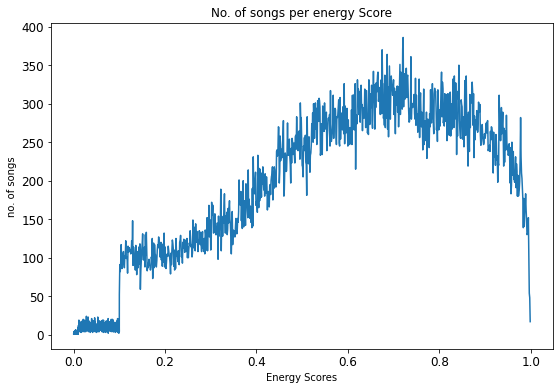

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize = (9,6))

plt.plot(list(counterDict.keys()), list(counterDict.values()))
plt.title("No. of songs per energy Score")
plt.xlabel("Energy Scores")
plt.xticks(fontsize = 12)
plt.ylabel("no. of songs")
plt.yticks(fontsize = 12)

plt.show()

#### Remarks: The data looks pretty evenly distributed, with a large number of songs having 0.1 energy score and 1 energy score

## Feature Analysis

#### To find out which features affect the energy of a song the most.

#### First approach: Draw a heat map to find the correlation between every category

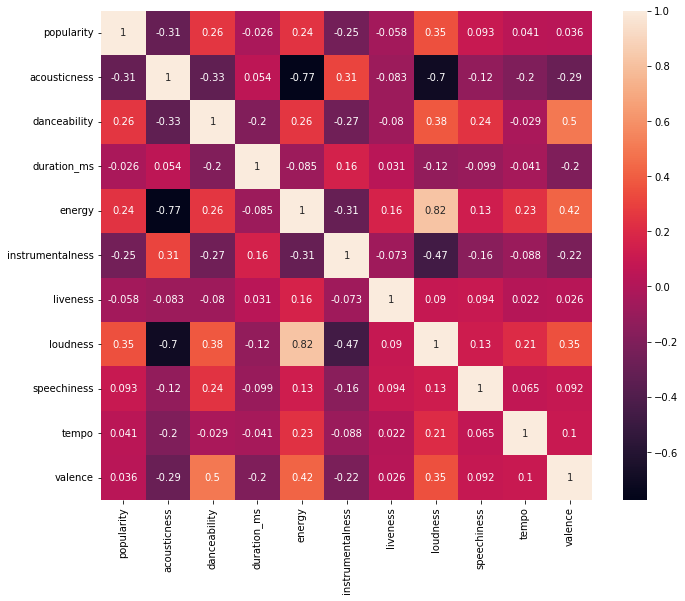

In [7]:
import seaborn as sns

plt.figure(figsize = (11,9))
cor = data.corr()
sns.heatmap(cor, annot = True)
plt.show()

#### Extract features that have the highest correlation to energy

In [8]:
## target variable
corr_target = abs(cor['energy']) ## abs is done to find high correlation; both +ve and -ve
rel_features = corr_target[corr_target >= 0.5] ## to find the related features
rel_features

acousticness    0.773812
energy          1.000000
loudness        0.819734
Name: energy, dtype: float64

#### Only the features with highest linear correlation are shown

## Creating a Neural Net to predict the energy of a song

#### 1. Functions that convert labels that are strings to one hot encodings. For example, if there were the genres rap, pop and jazz, they need to be converted to data that the network can understand. In one hot encoding, the single column of Genre is converted to columns (each for each genre label) such as is_Rap, is_Jazz and is_Pop. Each song is then assigned a value of 0 or 1 depending on its genre. 

In [9]:
# ## functions for one hot encoding of features

# def label_encode(origList, labelList):
#     coded_y = [] 
    
#     for value in origList:
#         coded_y.append(labelList.index(value))  ## storing the indices (in labelList) of the values of the origList
#     return coded_y

def encode_add(encode, category):
    for i in range(len(category[0])):  ## category[0] is all the categories
        column = []
        
        for array in encode:
            column.append(array[i])  ## as encoded is an array of lists of 0,1 values for each category
        data[category[0][i]] = column ## putting each column under their category in data so yea we're adding more columns in data, one for each category
            

In [10]:
from sklearn.preprocessing import OneHotEncoder

onehot_genre = OneHotEncoder(handle_unknown = 'ignore') ## intitalizing the encoders
onehot_key = OneHotEncoder(handle_unknown = 'ignore')
onehot_mode = OneHotEncoder(handle_unknown = 'ignore')
onehot_time = OneHotEncoder(handle_unknown = 'ignore')

## reshape(-1, 1) = choose any dimension with 1 column
## extracting the features with string values 
genre_list = np.array(data['genre']).reshape(-1, 1)
key_list = np.array(data['key']).reshape(-1, 1)
mode_list = np.array(data['mode']).reshape(-1, 1)
time_list = np.array(data['time_signature']).reshape(-1, 1)

onehot_genre.fit(genre_list) ## fitting the data to the encoder
genre_category = onehot_genre.categories_ ## takes out the distinct categories into an array
encoded_genre = onehot_genre.transform(genre_list).toarray() ## transforming the genre data into a matrix using one hot encoding
# genre_category

onehot_key.fit(key_list) 
key_category = onehot_key.categories_ 
encoded_key = onehot_key.transform(key_list).toarray() 

onehot_mode.fit(mode_list) 
mode_category = onehot_mode.categories_ 
encoded_mode = onehot_mode.transform(mode_list).toarray() 

onehot_time.fit(time_list) 
time_category = onehot_time.categories_ 
encoded_time = onehot_time.transform(time_list).toarray() 


#### One hot encoding has been done, so the original columns are dropped

In [11]:
data = data.drop("genre", axis = 1)
data = data.drop("key", axis = 1)
data = data.drop("mode", axis = 1)
data = data.drop("time_signature", axis = 1)

#### Encoded columns have to be added now using the encode_add method

In [12]:
encode_add(encoded_genre, genre_category)
encode_add(encoded_key, key_category)
encode_add(encoded_mode, mode_category)
encode_add(encoded_time, time_category)

#### Prep the data to be used by the neural net

In [13]:

import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

#adding all the labels that can be useful for the dataset
X_data = data[['acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 
             'tempo', 'valence', 'A Capella', 'Alternative', 'Anime','Blues', "Children's Music",  
             'Classical', 'Country','Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Opera','Pop', 'R&B', 'Rap', 
             'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'World', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G',
       'G#','Major', 'Minor']].values

#target variable
y_data = data['energy'].values

#normalizing the data using min-max normalization
X_data = (X_data - np.min(X_data, axis = 0)) / (np.max(X_data, axis = 0) - np.min(X_data, axis = 0))

#splitting the dataset into training, validation and testing data
X_train, X_rest, y_train, y_rest = train_test_split(X_data, y_data, test_size = 0.2, random_state = 2)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 2)

#### building the seqential model

In [14]:
X_data.shape ## no. of input states the net will have

(205592, 47)

In [15]:
from tensorflow import keras
from keras import layers

def buildNet():
    model = keras.Sequential([
        layers.Dense(units = 256, input_shape = [47], activation = 'relu'), ## 256 nodes in the 1st layer
        layers.BatchNormalization(),  ## adding normalization after each layer
        layers.Dense(units = 50, activation = 'relu'),  ## 50 nodes for 2nd layer
        layers.BatchNormalization(),
        layers.Dense(units = 1, activation = 'relu')  ## output layer
    ])
    return model

#### Training the model with X_train

In [19]:
# from kras.optimizers import Adam

model = buildNet()
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'] )  ## used mse because validation does not do well with mae

history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10)

Epoch 1/10
5140/5140 [==============================] - 28s 5ms/step - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 8.4966e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
5140/5140 [==============================] - 26s 5ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 3.0905e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
5140/5140 [==============================] - 26s 5ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 1.8975e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
5140/5140 [==============================] - 26s 5ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 7.6509e-05 - val_accuracy: 0.0000e+00
Epoch 5/10
5140/5140 [==============================] - 26s 5ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 1.3487e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
5140/5140 [==============================] - 26s 5ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 3.8504e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
5140/5140 [==============================] - 26

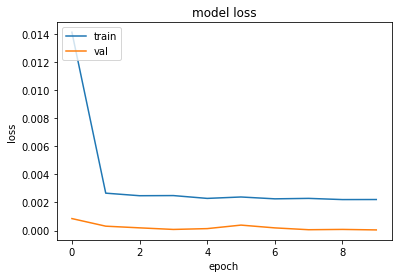

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### the model does pretty well when using mse instead of mae and without the batch size.

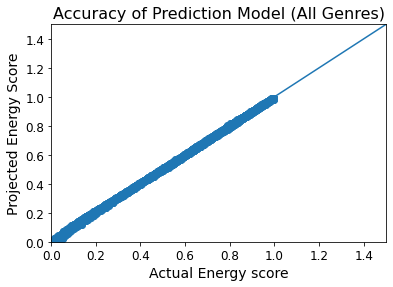

In [27]:

plt.scatter(y_test, model.predict(X_test))
#This line represents x=y which makes sense as that would mean that x (the projected popularity score)
#is equal to y (the actual popularity score). 
plt.plot([0,50], [0,50])
plt.title("Accuracy of Prediction Model (All Genres)", fontsize = 16)
plt.xlabel("Actual Energy score", fontsize = 14)
plt.ylabel("Projected Energy Score", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.show()

#### After the model is trained, it is tested using X_test. The error is calculated as the abs difference between real and predictd values and the mean and median is printed

In [30]:
import random
import statistics 

errors = []
predictions = model.predict(X_test)
real = y_test

for i in range(0, len(predictions)):
  error = abs(predictions[i][0] - real[i])
  errors.append(error)

print("Mean = ",statistics.mean(errors))
print("Median = ", statistics.median(errors))

Mean =  0.0048715846820152455
Median =  0.0037612823247909766
